In [5]:
import pandas as pd
import ast
df = pd.read_csv("/mnt/data/anlp-intent-classification/baseline/hedwig/metrics/bert_hier/metrics-train-roberta-annotator.csv")
df.head()

,Unnamed: 0,guid,text_a,text_b,text_c,text_d,label,target_labels_fine,predicted_labels_fine,target_labels_coarse,predicted_labels_coarse
0,0,11495063129,"[0, 0, 1, -1, -1, -1]","For my definition of a small business, I rely ...",NaN,NaN,101000,[1 0 1 0 0 0],[1 0 1 0 0 0],[1 1 0],[1 1 0]
1,1,11386195154,"[-1, 1, 0, 1, 1]","I understand that is the timing, yes, sir.",NaN,NaN,100000,[1 0 0 0 0 0],[1 0 0 0 0 0],[1 0 0],[1 0 0]
2,2,11635589127,"[-1, -1, 0, 1, -1]","Look, I am proud of what this Administration h...",NaN,NaN,1000,[0 0 1 0 0 0],[0 0 1 0 0 0],[0 1 0],[0 1 0]
3,3,11635230123,"[1, 1, -1, 1, 0, -1]",So let me say that this is a matter that's cur...,NaN,NaN,101,[0 0 0 1 0 1],[0 0 1 0 0 1],[0 1 1],[0 1 1]
4,4,11637282057,"[1, 0, 0, 1, 1, -1]",I have never spoken to Ms. Conway. But the Whi...,NaN,NaN,100000,[1 0 0 0 0 0],[1 0 0 0 0 0],[1 0 0],[1 0 0]


In [6]:
df[df["target_labels_coarse"]!=df["predicted_labels_coarse"]]

,Unnamed: 0,guid,text_a,text_b,text_c,text_d,label,target_labels_fine,predicted_labels_fine,target_labels_coarse,predicted_labels_coarse
19,19,11495063033,"[0, 0, 0, -1, 0, -1, -1]","No, I would not agree with that, sir.",NaN,NaN,101000,[1 0 1 0 0 0],[1 0 0 0 0 0],[1 1 0],[1 0 0]
32,32,11530956073,"[0, 1, -1, -1, -1, -1]","Congresswoman, we have made and are continuing...",NaN,NaN,101000,[1 0 1 0 0 0],[0 0 1 1 0 0],[1 1 0],[0 1 0]
36,36,11635230091,"[1, 1, 0, 0, 0, -1]",I can't -- I cannot answer that in a yes or no...,NaN,NaN,100001,[1 0 0 0 0 1],[0 0 0 0 0 1],[1 0 1],[0 0 1]
56,56,11497630051,"[0, -1, 0, 0, 1, 0]","Well, certainly, as a tribute to the strong ef...",NaN,NaN,1100,[0 0 1 1 0 0],[1 0 1 0 0 0],[0 1 0],[1 1 0]
69,69,11530956079,"[-1, -1, 0, -1, -1]","Congresswoman, yes. When we learned in 2015 th...",NaN,NaN,1100,[0 0 1 1 0 0],[1 0 1 0 0 0],[0 1 0],[1 1 0]
...,...,...,...,...,...,...,...,...,...,...,...
751,751,11495063044,"[0, -1, 0, -1, 0]",Due diligence trips are paid for by the projec...,NaN,NaN,1100,[0 0 1 1 0 0],[1 0 1 1 0 0],[0 1 0],[1 1 0]
759,759,11635230127,"[1, 0, 0, -1, 1, -1]",I don't expect I'm going to have a source of i...,NaN,NaN,101000,[1 0 1 0 0 0],[1 0 0 1 0 1],[1 1 0],[1 1 1]
760,760,11495063095,"[-1, 1, 0, -1, 1, 0]",I just got it at 12:29; it came out at 12:25.,NaN,NaN,100000,[1 0 0 0 0 0],[1 0 0 1 0 0],[1 0 0],[1 1 0]
795,795,11635230097,"[0, -1, 1, 0, 0, -1]",I'm not aware of that.,NaN,NaN,100001,[1 0 0 0 0 1],[0 0 0 0 0 1],[1 0 1],[0 0 1]


In [7]:
df['target_labels_fine'] = df['target_labels_fine'].apply(lambda x: ast.literal_eval( x.replace(" ", ", ")))
df['predicted_labels_fine'] = df['predicted_labels_fine'].apply(lambda x: ast.literal_eval( x.replace(" ", ", ")))
df['target_labels_coarse'] = df['target_labels_coarse'].apply(lambda x: ast.literal_eval( x.replace(" ", ", ")))
df['predicted_labels_coarse'] = df['predicted_labels_coarse'].apply(lambda x: ast.literal_eval( x.replace(" ", ", ")))

In [8]:
df.head()

,Unnamed: 0,guid,text_a,text_b,text_c,text_d,label,target_labels_fine,predicted_labels_fine,target_labels_coarse,predicted_labels_coarse
0,0,11495063129,"[0, 0, 1, -1, -1, -1]","For my definition of a small business, I rely ...",NaN,NaN,101000,"[1, 0, 1, 0, 0, 0]","[1, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 1, 0]"
1,1,11386195154,"[-1, 1, 0, 1, 1]","I understand that is the timing, yes, sir.",NaN,NaN,100000,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0]"
2,2,11635589127,"[-1, -1, 0, 1, -1]","Look, I am proud of what this Administration h...",NaN,NaN,1000,"[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]","[0, 1, 0]","[0, 1, 0]"
3,3,11635230123,"[1, 1, -1, 1, 0, -1]",So let me say that this is a matter that's cur...,NaN,NaN,101,"[0, 0, 0, 1, 0, 1]","[0, 0, 1, 0, 0, 1]","[0, 1, 1]","[0, 1, 1]"
4,4,11637282057,"[1, 0, 0, 1, 1, -1]",I have never spoken to Ms. Conway. But the Whi...,NaN,NaN,100000,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0]"


In [9]:
df = df.drop(["text_c", "text_d", "label", "Unnamed: 0"], axis=1)
df = df.rename(columns={'text_a': 'Sentiments of Different Annotators', 'text_b': 'Respondent Answer' })

In [10]:
df.head()

,guid,Sentiments of Different Annotators,Respondent Answer,target_labels_fine,predicted_labels_fine,target_labels_coarse,predicted_labels_coarse
0,11495063129,"[0, 0, 1, -1, -1, -1]","For my definition of a small business, I rely ...","[1, 0, 1, 0, 0, 0]","[1, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 1, 0]"
1,11386195154,"[-1, 1, 0, 1, 1]","I understand that is the timing, yes, sir.","[1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0]"
2,11635589127,"[-1, -1, 0, 1, -1]","Look, I am proud of what this Administration h...","[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]","[0, 1, 0]","[0, 1, 0]"
3,11635230123,"[1, 1, -1, 1, 0, -1]",So let me say that this is a matter that's cur...,"[0, 0, 0, 1, 0, 1]","[0, 0, 1, 0, 0, 1]","[0, 1, 1]","[0, 1, 1]"
4,11637282057,"[1, 0, 0, 1, 1, -1]",I have never spoken to Ms. Conway. But the Whi...,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0]"


In [11]:
len(df[df.target_labels_coarse!=df.predicted_labels_coarse]), len(df[df.target_labels_fine != df.predicted_labels_fine])

(70, 99)

In [12]:
temp = df[(df.target_labels_coarse==df.predicted_labels_coarse) & (df.target_labels_fine != df.predicted_labels_fine)]

In [13]:
import pandas as pd
temp[['answer', 'shift', 'cant_answer']] = temp['predicted_labels_coarse'].apply(pd.Series)

/tmp/ipykernel_110991/3940263797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[['answer', 'shift', 'cant_answer']] = temp['predicted_labels_coarse'].apply(pd.Series)
/tmp/ipykernel_110991/3940263797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[['answer', 'shift', 'cant_answer']] = temp['predicted_labels_coarse'].apply(pd.Series)
/tmp/ipykernel_110991/3940263797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [14]:
len(temp[temp["answer"]==0]), len(temp[temp["shift"]==0]), len(temp[temp["cant_answer"]==0])

(8, 8, 24)

In [15]:
temp

,guid,Sentiments of Different Annotators,Respondent Answer,target_labels_fine,predicted_labels_fine,target_labels_coarse,predicted_labels_coarse,answer,shift,cant_answer
3,11635230123,"[1, 1, -1, 1, 0, -1]",So let me say that this is a matter that's cur...,"[0, 0, 0, 1, 0, 1]","[0, 0, 1, 0, 0, 1]","[0, 1, 1]","[0, 1, 1]",0,1,1
7,11530956043,"[0, 1, 0, -1, 1, -1, -1]","Congressman, since we learned about that, we r...","[1, 1, 1, 0, 0, 0]","[1, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 1, 0]",1,1,0
10,11495063127,"[0, 0, -1, 1, -1, 1]","What was my--say that again, sir?","[0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 1, 1]","[0, 0, 1]","[0, 0, 1]",0,0,1
26,11530956105,"[0, 1, 1, -1, -1, -1, 0]","Congressman, it is something that we are looki...","[1, 0, 1, 1, 0, 0]","[1, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 1, 0]",1,1,0
55,11530956139,"[1, 0, -1, -1, 0, -1]","Yes, Congressman. We believe that everyone aro...","[1, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0]",1,0,0
67,11497630004,"[0, 0, 1, -1, -1, -1, 0]","Well, Mr. Chairman, I'm not sure he said it wa...","[1, 0, 1, 0, 0, 0]","[1, 0, 0, 1, 0, 0]","[1, 1, 0]","[1, 1, 0]",1,1,0
77,11635230000,"[-1, 1, -1, 1, -1, 1, 1]","As of yesterday, I am no longer a lawyer. I ha...","[1, 0, 1, 1, 0, 0]","[1, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 1, 0]",1,1,0
135,11497630079,"[-1, -1, 0, 0, 0, 0, 0]",Are you referring to the member of the Secret ...,"[0, 0, 0, 0, 1, 1]","[0, 0, 0, 0, 0, 1]","[0, 0, 1]","[0, 0, 1]",0,0,1
136,11635230049,"[0, 1, 1, 1, -1, 0, 1]","Mr. Jordan, I didn't actually set that up. It ...","[1, 1, 0, 1, 0, 0]","[1, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 1, 0]",1,1,0
172,11635230008,"[-1, -1, 1, 1, 1, -1, 1]","Back in 2017 when--actually, I apologize. In 2...","[1, 1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0]",1,0,0


In [16]:
def compare_lists(row):
    # Assuming each list is of size 6
    matching_indices = [i+1 for i in range(6) if row['target_labels_fine'][i] != row['predicted_labels_fine'][i]]
    div_2_indices = set([(i-1) // 2 +1 for i in matching_indices])
    return matching_indices, div_2_indices

# Apply the function to each row
temp['incorrect_intent_predicted'], temp['associated_act'] = zip(*temp.apply(compare_lists, axis=1))


/tmp/ipykernel_110991/3579677571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['incorrect_intent_predicted'], temp['associated_act'] = zip(*temp.apply(compare_lists, axis=1))
/tmp/ipykernel_110991/3579677571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['incorrect_intent_predicted'], temp['associated_act'] = zip(*temp.apply(compare_lists, axis=1))


In [17]:
# temp = temp.drop(["matching_indices",	"div_2_indices"	,"not_matching_indices"], axis=1)

KeyError: "['matching_indices', 'div_2_indices', 'not_matching_indices'] not found in axis"

In [18]:
temp

,guid,Sentiments of Different Annotators,Respondent Answer,target_labels_fine,predicted_labels_fine,target_labels_coarse,predicted_labels_coarse,answer,shift,cant_answer,incorrect_intent_predicted,associated_act
3,11635230123,"[1, 1, -1, 1, 0, -1]",So let me say that this is a matter that's cur...,"[0, 0, 0, 1, 0, 1]","[0, 0, 1, 0, 0, 1]","[0, 1, 1]","[0, 1, 1]",0,1,1,"[3, 4]",{2}
7,11530956043,"[0, 1, 0, -1, 1, -1, -1]","Congressman, since we learned about that, we r...","[1, 1, 1, 0, 0, 0]","[1, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 1, 0]",1,1,0,[2],{1}
10,11495063127,"[0, 0, -1, 1, -1, 1]","What was my--say that again, sir?","[0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 1, 1]","[0, 0, 1]","[0, 0, 1]",0,0,1,[5],{3}
26,11530956105,"[0, 1, 1, -1, -1, -1, 0]","Congressman, it is something that we are looki...","[1, 0, 1, 1, 0, 0]","[1, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 1, 0]",1,1,0,[4],{2}
55,11530956139,"[1, 0, -1, -1, 0, -1]","Yes, Congressman. We believe that everyone aro...","[1, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0]",1,0,0,[2],{1}
67,11497630004,"[0, 0, 1, -1, -1, -1, 0]","Well, Mr. Chairman, I'm not sure he said it wa...","[1, 0, 1, 0, 0, 0]","[1, 0, 0, 1, 0, 0]","[1, 1, 0]","[1, 1, 0]",1,1,0,"[3, 4]",{2}
77,11635230000,"[-1, 1, -1, 1, -1, 1, 1]","As of yesterday, I am no longer a lawyer. I ha...","[1, 0, 1, 1, 0, 0]","[1, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 1, 0]",1,1,0,[4],{2}
135,11497630079,"[-1, -1, 0, 0, 0, 0, 0]",Are you referring to the member of the Secret ...,"[0, 0, 0, 0, 1, 1]","[0, 0, 0, 0, 0, 1]","[0, 0, 1]","[0, 0, 1]",0,0,1,[5],{3}
136,11635230049,"[0, 1, 1, 1, -1, 0, 1]","Mr. Jordan, I didn't actually set that up. It ...","[1, 1, 0, 1, 0, 0]","[1, 0, 1, 0, 0, 0]","[1, 1, 0]","[1, 1, 0]",1,1,0,"[2, 3, 4]","{1, 2}"
172,11635230008,"[-1, -1, 1, 1, 1, -1, 1]","Back in 2017 when--actually, I apologize. In 2...","[1, 1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]","[1, 0, 0]",1,0,0,[2],{1}


In [ ]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/3c/25/c63fb77ceece3fbd85142381f97c7aeae6aeaf9a2993a20322fc9ae1ca7b/matplotlib-3.7.4-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/71/7f20855592cc929bc206810432b991ec4c702dc26b0567b132e52c85536f/contourpy-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/3e/32/a050e372b734d1e9dcaebc2706582ea32557802150492d948bae2787b10e/fonttools-4.44.3-cp38-cp38-manylinux_2_17_x86_64.manyl

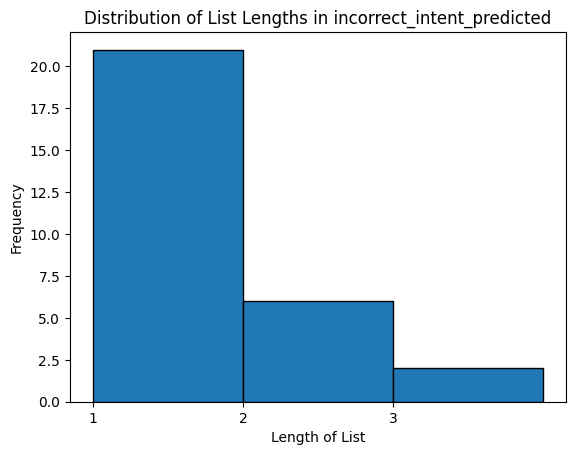

In [21]:
import matplotlib.pyplot as plt

# Calculate lengths of lists in the column
lengths = temp['incorrect_intent_predicted'].apply(len)

# Plot the histogram
plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2), edgecolor='black')  # Adjust the bin range as needed
plt.title('Distribution of Number of Incorrect Intents Predicted')
plt.xlabel('Number of Incorrect Intents predicted')
plt.ylabel('Frequency')
plt.xticks((1,2,3))
plt.show()
